# Read spectrometer scan data from measurement device

This Python program reads spectrometer data through USB port and saves the data as text file (.out).

Jouni Huopana 12.12.2023

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import time
import serial
from serial.tools import list_ports
enmu_ports = enumerate(list_ports.comports())

In [78]:
port = ""
for n, (p, descriptor, hid) in enmu_ports:
    print(p, descriptor, hid)
    if descriptor == "USB-Serial Controller D":
        port = p

COM3 Intel(R) Active Management Technology - SOL (COM3) PCI\VEN_8086&DEV_06E3&SUBSYS_097E1028&REV_00\3&11583659&0&B3
COM5 USB Serial Device (COM5) USB VID:PID=2341:0043 SER=554313137373519151B1 LOCATION=1-3.3


In [98]:
arduino = serial.Serial(port='COM5', baudrate=115200, timeout=.1)

meas = []

idx = 1

while True:
    data = arduino.readline().decode("utf-8")
    if len(data)>2:
        if "##" in data:
            pass
        else:
            print("Measurement",idx)
            meas.append(data)
            #print(data)
            idx += 1
    if "DONE" in data:
        break

arduino.close()

Measurement 1
Measurement 2
Measurement 3
Measurement 4
Measurement 5
Measurement 6
Measurement 7
Measurement 8
Measurement 9
Measurement 10
Measurement 11
Measurement 12
Measurement 13
Measurement 14
Measurement 15
Measurement 16
Measurement 17
Measurement 18
Measurement 19
Measurement 20
Measurement 21
Measurement 22
Measurement 23
Measurement 24
Measurement 25
Measurement 26
Measurement 27
Measurement 28
Measurement 29
Measurement 30


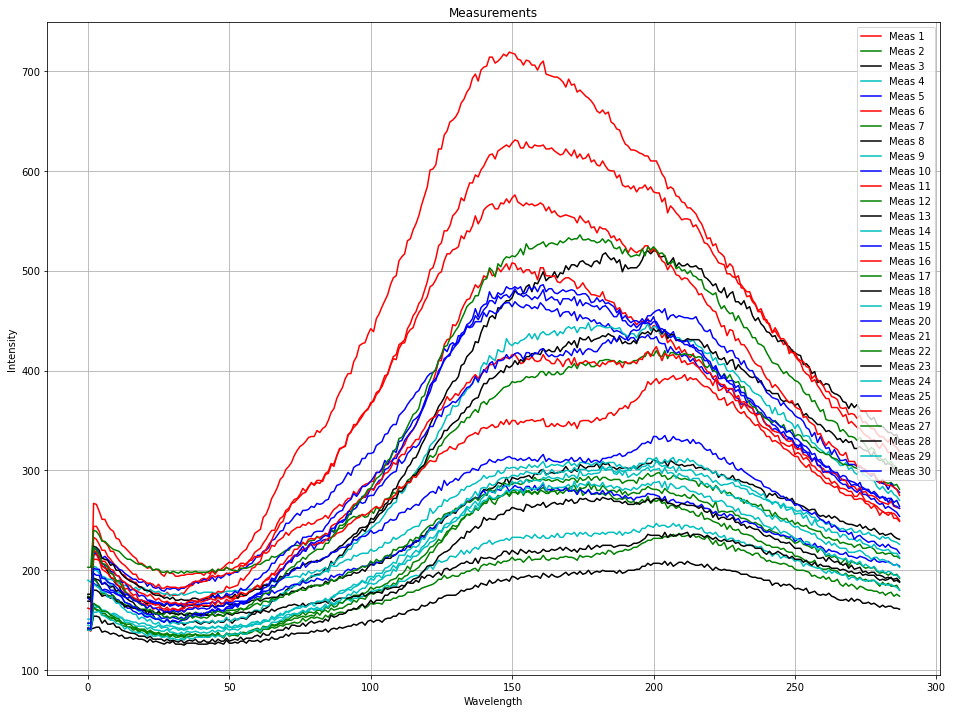

In [99]:
nmeas = 30

measurements = np.zeros((nmeas,288))
names = []
for i in range(nmeas):
    names.append("Meas "+str(i+1))

plt.figure(figsize=(16,12))
li = ['b','r','g','k','c']

idx=0
idl=0
for line in meas:
    if "##" in line:
        pass
    else:
        line = line.split(",")
        x = np.array(line[:-1]).astype("int")
        measurements[idx,:] = x
        

        idl = (idx + 1) % len(li)
        
        idx += 1
        plt.plot(x,li[idl])

#plt.plot(np.mean(measurements,axis=0),'--r')
    
plt.title("Measurements")
plt.grid()
plt.legend(names,loc=1)
plt.ylabel("Intensity")
plt.xlabel("Wavelength")
plt.show()

timestr = time.strftime("%Y%m%d-%H%M%S")

np.savetxt('NC_solid_green_left_red_right'+timestr+'.out', measurements, delimiter=',')